<a href="https://colab.research.google.com/github/harsh0032/Machine-Learning/blob/main/dataset_spine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
rng = default_rng()

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
path = "/content/drive/MyDrive/Colab_data_files/dataset"


In [10]:
# 1.8.1 Change working directory
os.chdir(path)

# 1.8.2 list files
os.listdir()            # List all files in the folder


['ad_processed.csv', 'dataset_spine_modified.csv']

In [11]:
ad = pd.read_csv("dataset_spine_modified.csv")

In [12]:
ad.head()
print("\n-----\n")
ad.dtypes
print("\n------\n")
ad.dtypes.value_counts()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1



-----



Col1         float64
Col2         float64
Col3         float64
Col4         float64
Col5         float64
Col6         float64
Col7         float64
Col8         float64
Col9         float64
Col10        float64
Col11        float64
Col12        float64
Class_att      int64
dtype: object


------



float64    12
int64       1
dtype: int64

In [13]:
num_data = ad.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape     # (310, 13)  
num_data.columns

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


(310, 13)

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att'],
      dtype='object')

In [14]:
num_data.shape 

(310, 13)

In [15]:
cols=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col2', 'Class_att' ]

In [16]:
ss= StandardScaler()

In [17]:
nc = ss.fit_transform(num_data.loc[:,cols])


In [18]:
nc.shape

(310, 13)

In [19]:
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col2,Class_att
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,0.501369,0.690066
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.748769,0.690066


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart')

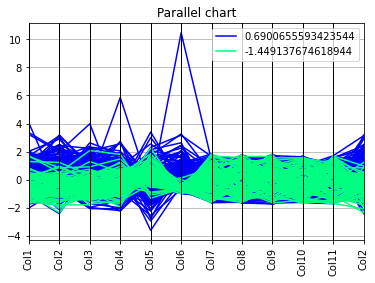

In [21]:

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc,
                                 'Class_att',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart")

Text(0.5, 1.0, 'Andrews plots with random data')

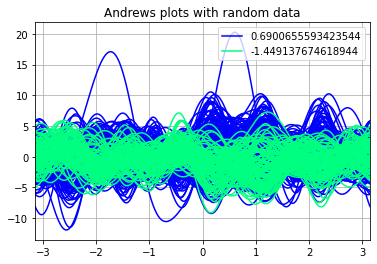

In [23]:
fig2 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'Class_att',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

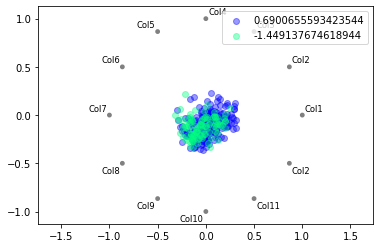

In [26]:
fig3 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='Class_att',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )


In [27]:
from sklearn.manifold import TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(310, 2)

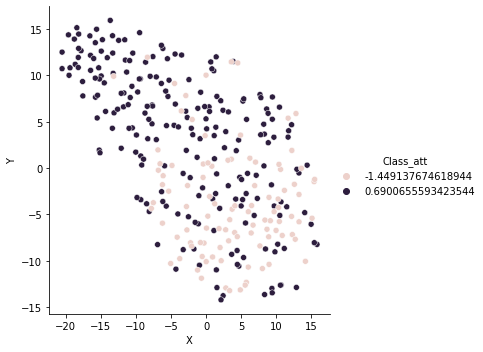

In [28]:
X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape    # (1000,2), numpy array
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.Class_att,    # Colur each point as per 1 or 0
            data = df
            )


In [30]:
pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 29.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ec0dab4f4f596c86b79fa7cba4e89098c41bd60252d6527a695446dc6b152f89
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=3de8eac6a791c8d1ff7fefc98b21fc0558d3e664a10cb227aa9b0ac61b882b13
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [31]:
import umap

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(310, 2)

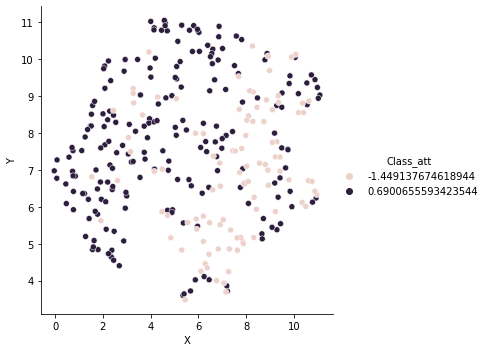

In [32]:
X_embedded = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(nc.iloc[:,:-1])
X_embedded.shape    # (1000,2), numpy array
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.Class_att,    # Colur each point as per 1 or 0
            data = df
            )